In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Đọc và tiền xử lý dữ liệu

In [2]:
f = open("dataset1.txt")
dataset = []

for line in f:
    [x,y,cluster] = line.split()
    dataset.append([float(x),float(y),int(cluster)])
    
f.close()

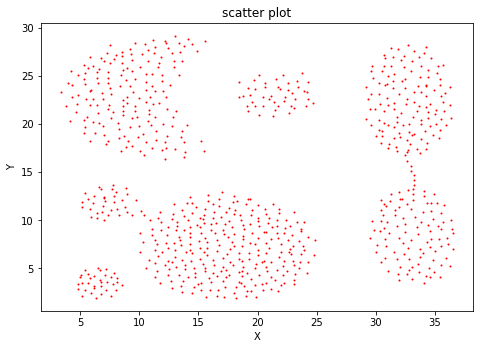

In [21]:
X = []
Y = []

for item in dataset:
    X.append(item[0])
    Y.append(item[1])

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X, Y, color='r', s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('scatter plot')

plt.show()

In [133]:
color_mapping = {
    0: 'b',
    1: 'g',
    2: 'r',
    3: 'c',
    4: 'm',
    5: 'y',
    6: 'k',
}

In [138]:
def plot_data(X, Y, list_kernel):
    kX = [kernel[0] for kernel in list_kernel]
    kY = [kernel[1] for kernel in list_kernel]
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(X, Y, color='r', s=1)
    ax.scatter(kX, kY, color='b', s=10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('scatter plot')
    
    plt.show()

# Các thuật toán phân cụm

## K-mean Clustering

In [32]:
oo = 1000000000

def find_x_y_max_min(X,Y):
    x_max = float(0)
    y_max = float(0)
    x_min = float(oo)
    y_min = float(oo)
    
    for x in X:
        x_max = max(x_max, x)
        x_min = min(x_min, x)
        
    for y  in Y:
        y_max = max(y_max, y)
        y_min = min(y_min, y)
        
    return x_max, x_min, y_max, y_min
    
print( find_x_y_max_min(X,Y) )

(36.55, 3.35, 29.15, 1.95)


In [47]:
def random_kernel(X, Y, num_kernel):
    x_max, x_min, y_max, y_min = find_x_y_max_min(X,Y)
    x_rand_norm = np.random.random(size = num_kernel)
    y_rand_norm = np.random.random(size = num_kernel)
    res = []
    for i in range(num_kernel):
        res.append([x_min + x_rand_norm[i] * (x_max - x_min) , y_min + y_rand_norm[i] * (y_max - y_min)])
    return res

random_kernel(X, Y, 3)

[[36.204664144018246, 3.995657089270268],
 [5.151942177005514, 17.10730819172589],
 [30.708954619023352, 24.03646214406129]]

In [39]:
# Tính khoảng cách Euclid
def distance_caculate(A, B):
    n = len(A)
    res = 0
    for i in range(n):
        res += (A[i] - B[i]) * (A[i] - B[i])
    res = np.sqrt(res)
    return res

distance_caculate([1,1], [2,2])

1.4142135623730951

In [50]:
def clustering(X, Y, list_kernel):
    n = len(X)
    k = len(list_kernel)
    label = []
    for i in range(n):
        min_distance = float(oo)
        recent_label = -1
        for j in range(k):
            d = distance_caculate([X[i], Y[i]], list_kernel[j])
            if d < min_distance:
                min_distance = d
                recent_label = j
        label.append(recent_label)
    return label

In [92]:
def relocate_kernel(label, X, Y, num_kernel):
    n = len(X)
    list_point = [[] for i in range(num_kernel)]
    
    for i in range(n):
        list_point[label[i]].append([X[i], Y[i]])
        
    res = []
    for i in range(num_kernel):
        new_kernel = np.average(list_point[i], axis=0)
        res.append(list(new_kernel))
    return res

In [99]:
def diff_between_kernel(old_kernel, new_kernel, num_kernel):
    return np.average([distance_caculate(old_kernel[i], new_kernel[i]) for i in range(num_kernel)])

In [65]:
a = [
    [1,2],
    [2,4],
    [1,1],
    [1,1]
]
print(np.average(a, axis=0))

[1.25 2.  ]


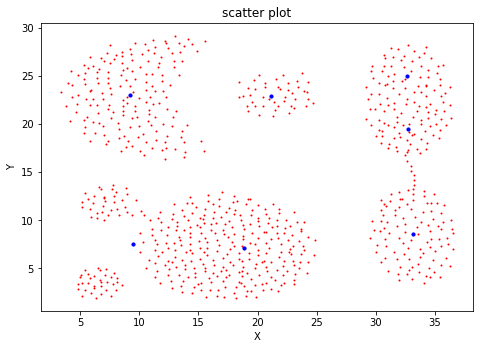

In [139]:
esp = 0.01

def kmean_clustering(X, Y, num_kernel):
    recent_kernel = random_kernel(X, Y, num_kernel)
    
    while True:
        label = clustering(X,Y,recent_kernel)
        new_kernel = relocate_kernel(label, X, Y, num_kernel)
        if diff_between_kernel(recent_kernel, new_kernel, num_kernel) <= esp:
            return recent_kernel
        else:
            recent_kernel = new_kernel

list_kernel = kmean_clustering(X,Y, 7)

plot_data(X, Y, list_kernel)